In [16]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [61]:
##This is to import the insurance data and get a brief understanding of what type of data is available
insurance = pd.read_csv('insurance.csv')
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [67]:
##Now lets see what type of spread is available for the different data types / columns

avg_cost = round(insurance["charges"].mean(),2)
avg_bmi = round(insurance['bmi'].mean(),2)
avg_num_children = round(insurance['children'].mean(),0)
num_males = len(insurance[insurance['sex'] == 'male'])
num_females = len(insurance[insurance['sex'] == 'female'])
num_smokers = len(insurance[insurance['smoker'] == 'yes'])
num_nonsmokers = len(insurance[insurance['smoker'] == 'no'])

print(f'Number of People: {len(insurance)}')
print(f'Number of Males: {num_males}')
print(f'Number of Females: {num_females}')
print(f'Number of Smokers: {num_smokers}')
print(f'Number of Non-Smokers: {num_nonsmokers}')
print(f'Average Cost: {avg_cost}')
print(f'Average BMI: {avg_bmi}')
print(f'Average Number of Children: {avg_num_children}')


Number of People: 1338
Number of Males: 676
Number of Females: 662
Number of Smokers: 274
Number of Non-Smokers: 1064
Average Cost: 13270.42
Average BMI: 30.66
Average Number of Children: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

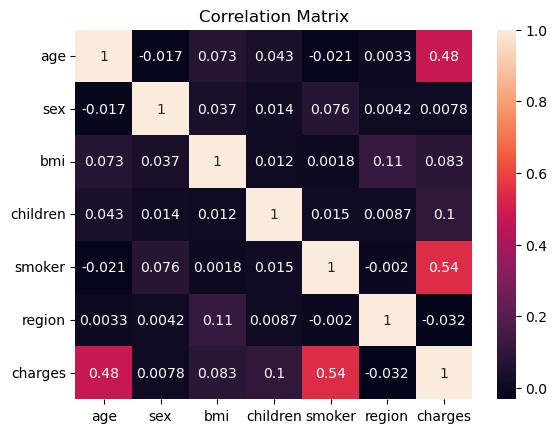

In [17]:
##Doing a correlation matrix to determine any direct correlations to cost
insurance_numerize = insurance

for i in insurance_numerize.columns:
    if(insurance_numerize[i].dtype == 'object'):
        insurance_numerize[i] = insurance_numerize[i].astype('category')
        insurance_numerize[i] = insurance_numerize[i].cat.codes

correlation_matrix = insurance_numerize.corr(method = 'kendall')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show

[Text(0.5, 1.0, 'Smoker and Cost Correlation')]

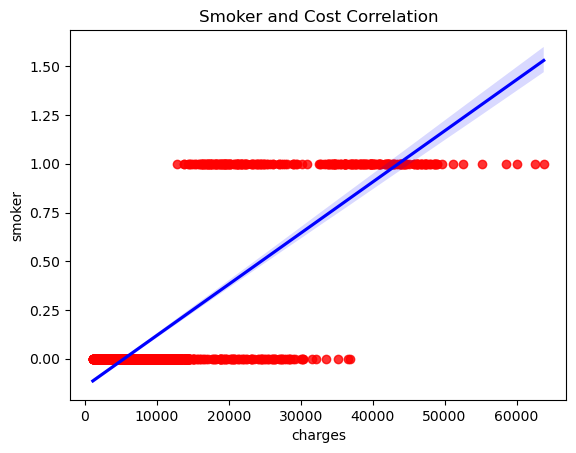

In [29]:
##From the table above it appears two things that correlate closely to cost (charges) is their smoker status and age
##One interesting slight correlation in the data is BMI to what region the person lives in
##Now lets plot those three tables that show their correlation

sns.regplot(x = 'charges', y = 'smoker', data = insurance_numerize, scatter_kws={'color':'red'}, line_kws={'color':'blue'}).set(title='Smoker and Cost Correlation')

[Text(0.5, 1.0, 'Age and Cost Correlation')]

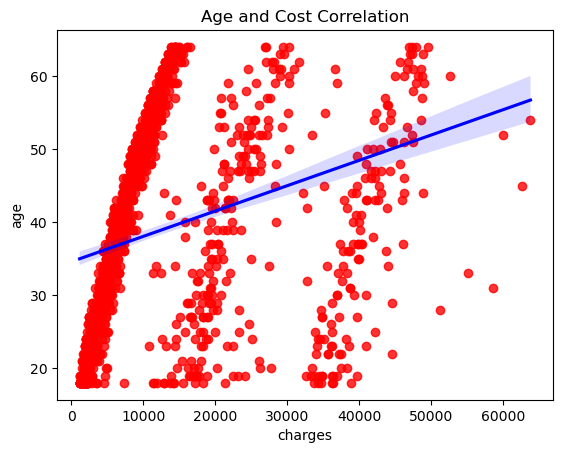

In [30]:
sns.regplot(x = 'charges', y = 'age', data = insurance_numerize, scatter_kws={'color':'red'}, line_kws={'color':'blue'}).set(title='Age and Cost Correlation')

Text(0, 0.5, 'BMI')

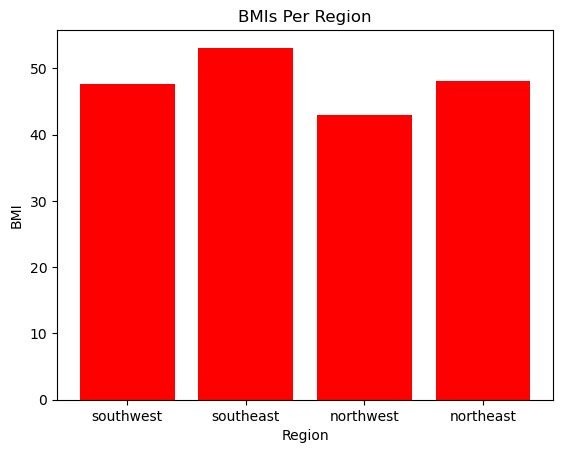

In [84]:
plt.bar(insurance['region'],  insurance['bmi'], color='red')
plt.title('BMIs Per Region')
plt.xlabel('Region')
plt.ylabel('BMI')

In [ ]:
##From the charts above we can see that the the older you are, the more expensive your insurance charges will be.
##Likewise to if you smoke compared to not smoking.
##There also seems to be a concentration of people with higher BMIs in the southeast region